In [3]:
import torch
import glob
import numpy as np
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
#three constraints
def check_for_path(maze: np.ndarray) -> bool:
    """Checks whether the input is a valid maze. Checks the following:
            * there are no islands (i.e. there are no loops).
            * all white pixels are connected.
        Args:
            maze:  The maze to be evaluated
        Returns:
            Whether the maze is valid or not.
        """
    # single connected-component
    labeled_array, num_features = label(maze)

    npmaze = np.array(maze)
    mx, my = npmaze.shape
    if num_features > 1:
        return False
    return True

def check_for_loops(maze: np.ndarray) -> bool:
    npmaze = np.array(maze)
    mx, my = npmaze.shape
    
    for i in range(mx - 1):
        for j in range(my - 1):
            if maze[i, j] == 1:
                if maze[i + 1, j] == 1 and maze[i, j + 1] == 1 and maze[i + 1, j + 1] == 1:
                    return False
    maze = maze - 1
    s = [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]
    labeled_array, num_features = label(maze, structure=s)
    for feat in range(1, num_features + 1):
        indexes = np.array(np.where(labeled_array == feat))
        if np.all(indexes[:, :] != 0) and np.all(indexes[0, :] != mx - 1) and np.all(indexes[1, :] != my - 1):
            return False
    return True
    
def check_for_full_paths(maze: np.ndarray) -> bool:
    """Checks whether the input is a valid maze. Checks the following:
        * there are no islands (i.e. there are no loops).
        * all white pixels are connected.
    Args:
        maze:  The maze to be evaluated
    Returns:
        Whether the maze is valid or not.
    """

    # single connected-component
    mx, my = maze.shape
    stack = [(j, i) for i in range(mx) for j in range(my) if maze[i, j] == 1]
    if len(stack) == 0:
        return False
    dx = [0, 1, 0, -1]
    dy = [-1, 0, 1, 0]  # 4 directions to move in the maze
    while len(stack) > 0:
        (cx, cy) = stack[-1]
        nlst = []  # list of available neighbors
        for i in range(4):
            nx = cx + dx[i]
            ny = cy + dy[i]
            if 0 <= nx < mx and 0 <= ny < my:
                if maze[ny][nx] == 0:
                    # of occupied neighbors must be 1
                    ctr = 0
                    for j in range(4):
                        ex = nx + dx[j]
                        ey = ny + dy[j]
                        if 0 <= ex < mx and 0 <= ey < my:
                            if maze[ey][ex] == 1:
                                ctr += 1
                    if ctr == 1:
                        nlst.append(i)
        # if 1 or more neiget_data_check_full_pathsghbors available then randomly select one and move
        if len(nlst) > 0:
            return False
        else:
            stack.pop()
    return True

In [5]:
def get_data_check_for_path(file_path):
    files = glob.glob(file_path)
    files.sort()
    run_stats = []
    for file in files:
        correct = 0
        sample = torch.load(file).numpy()
        for maze in sample:
            correct += int(check_for_path(maze))
        run_stats.append(correct)
    return run_stats

In [6]:
def get_data_check_for_loops(file_path):
    files = glob.glob(file_path)
    files.sort()
    run_stats = []
    for file in files:
        correct = 0
        sample = torch.load(file).numpy()
        for maze in sample:
            correct += int(check_for_loops(maze))
        run_stats.append(correct)
    return run_stats

In [17]:
def get_data_check_full_paths(file_path):
    files = glob.glob(file_path)
    files.sort()
    run_stats = []
    for file in files:
        correct = 0
        sample = torch.load(file).numpy()
        for maze in sample:
            correct += int(check_for_full_paths(maze))
        run_stats.append(correct)
    return run_stats

In [20]:
import os
print(os.getcwd())
stdcgan_paths = get_data_check_for_path('models/stdcgan-1d/samples/2018-07-02/16-33-29/*.sample.tar')
stdcgan_loops = get_data_check_for_loops('models/stdcgan-1d/samples/2018-07-02/16-33-29/*.sample.tar')
stdcgan_full_paths = get_data_check_full_paths('models/stdcgan-1d/samples/2018-07-02/16-33-29/*.sample.tar')

/home/kieran/Documents/college/maze-gan/src


In [33]:
data = pd.DataFrame({'Sample number': range(400, 120400, 400),
                    'Every white square is accesible': stdcgan_paths,
                    'No loops in the available paths': stdcgan_loops,
                    'Maze space is maximised': stdcgan_full_paths
                    })

In [34]:
datamelt = data.melt('Sample number', var_name='Constraints',  value_name='Number correct')

In [35]:
datamelt

,Sample number,Constraints,Number correct
0,400,Every white square is accesible,69
1,800,Every white square is accesible,6
2,1200,Every white square is accesible,7
3,1600,Every white square is accesible,31
4,2000,Every white square is accesible,16
5,2400,Every white square is accesible,9
6,2800,Every white square is accesible,21
7,3200,Every white square is accesible,22
8,3600,Every white square is accesible,10
9,4000,Every white square is accesible,13


In [36]:
sns.set_context("paper")

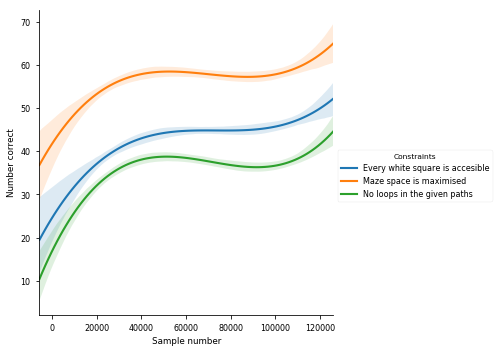

In [37]:
all_trends = sns.lmplot(x='Sample number', y='Number correct', hue='Constraints', data=datamelt, order=3, scatter=False)
all_trends.savefig('constraints_trends.png')